In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.utils import shuffle
from keras.preprocessing import image
import cv2
import tensorflow as tf
from PIL import Image
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import re
import random

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from tensorflow.keras.preprocessing import image

In [4]:
data_directory = r"C:\Users\Leticia Martinez\Desktop\IRONHACK\Labs\Project_V\garbage_classification"

Image path: C:\Users\Leticia Martinez\Desktop\IRONHACK\Labs\Project_V\garbage_classification\shoes\shoes92.jpg


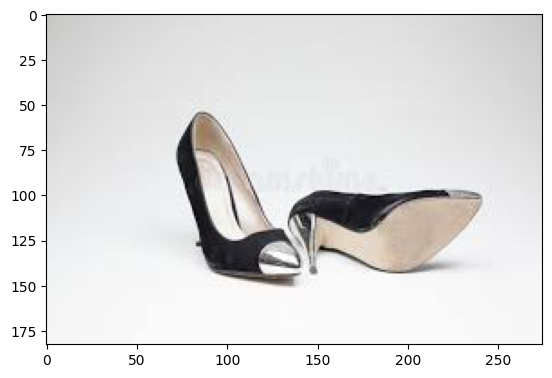

In [5]:
subfolders = os.listdir(data_directory)
random_subfolder = random.choice(subfolders)
subfolder_path = os.path.join(data_directory, random_subfolder)

random_file = random.choice(os.listdir(subfolder_path))

image_path = os.path.join(subfolder_path, random_file)
random_image = image.load_img(image_path)
print('Image path:', image_path)
plt.imshow(random_image)
plt.show()


In [6]:
garbage_types_labels = {
    'battery': 'battery',
    'biological': 'biological',
    'brown-glass': 'brown-glass',
    'cardboard': 'cardboard',
    'clothes': 'clothes',
    'green-glass': 'green-glass',
    'metal': 'metal',
    'paper': 'paper',
    'plastic': 'plastic',
    'shoes': 'shoes',
    'trash': 'trash'
}


Hereby we are going to create a dataframe with with each photo:
- We create a list (filenames_list) with all the filenames in the dataset.
- We create a list to store the corresponding category (categories_list). To take into account that each folder of the dataset has one class of data
- We do a for loop with all the files on the folders to loop each element of the dictionary with all our garbage types. The loop obtains the name slist of each file and store them in (filenames). The same for categories (categories_list) storages the list of categories as much of times that the categories is present in the files.
- Then, we create the df wit two columns 'Image'and'Garbage_category'.
- Finally, we create a fx (def file_rename) to create a prefix to each file. This will help us in the next steps to model and analyse each file.

In [10]:
# list containing all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for item in garbage_types_labels:
    filenames = os.listdir(data_directory + "/" + str(garbage_types_labels[item]))
    
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [item] * len(filenames)
    
df = pd.DataFrame({
    'Image': filenames_list,
    'Category': categories_list
})
df

,Image,Category
0,battery1.jpg,battery
1,battery10.jpg,battery
2,battery100.jpg,battery
3,battery101.jpg,battery
4,battery102.jpg,battery
...,...,...
14735,trash95.jpg,trash
14736,trash96.jpg,trash
14737,trash97.jpg,trash
14738,trash98.jpg,trash


In [11]:
def file_rename(df, col_name):
    df[col_name] = df[col_name].astype(str).apply(lambda x: x[:re.search("\d", str(x)).start()] + '/' + str(x))
    return df

In [12]:
df=file_rename(df, 'Image')
df

,Image,Category
0,battery/battery1.jpg,battery
1,battery/battery10.jpg,battery
2,battery/battery100.jpg,battery
3,battery/battery101.jpg,battery
4,battery/battery102.jpg,battery
...,...,...
14735,trash/trash95.jpg,trash
14736,trash/trash96.jpg,trash
14737,trash/trash97.jpg,trash
14738,trash/trash98.jpg,trash


In [14]:
garbage_types_labels = {
    'battery': 0,
    'biological': 1,
    'brown-glass': 2,
    'cardboard': 3,
    'clothes': 4,
    'green-glass': 5,
    'metal': 6,
    'paper': 7,
    'plastic': 8,
    'shoes': 9,
    'trash': 10
}

df['Category'] = df['Category'].replace(garbage_types_labels)
df

,Image,Category
0,battery/battery1.jpg,0
1,battery/battery10.jpg,0
2,battery/battery100.jpg,0
3,battery/battery101.jpg,0
4,battery/battery102.jpg,0
...,...,...
14735,trash/trash95.jpg,10
14736,trash/trash96.jpg,10
14737,trash/trash97.jpg,10
14738,trash/trash98.jpg,10


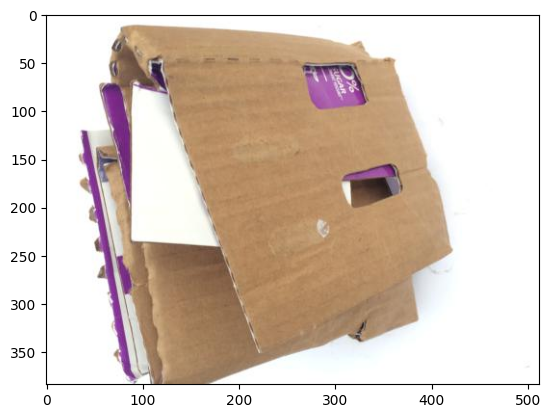

In [15]:
random_row = random.randint(0, len(df) - 1)
sample = df.iloc[random_row]
image_path = os.path.join(data_directory, sample['Image'])
random_image = image.load_img(image_path)
plt.imshow(random_image)
plt.show()

In [16]:
duplicates_exist = df.duplicated().any()
print(duplicates_exist)

False


In [17]:
nulls=df.isnull().any()
print(nulls)

Image       False
Category    False
dtype: bool


In [18]:
def split_data(df, ratio):
    train_data, test_data = train_test_split(df, test_size=(1 - ratio), shuffle=True)
    return train_data, test_data

In [19]:
train_data, test_data = split_data(df, 0.8)

In [20]:
train_data

,Image,Category
3884,clothes/clothes1409.jpg,4
6021,clothes/clothes3332.jpg,4
3074,cardboard/cardboard583.jpg,3
239,battery/battery314.jpg,0
14506,trash/trash516.jpg,10
...,...,...
8677,clothes/clothes930.jpg,4
1135,biological/biological270.jpg,1
7310,clothes/clothes4493.jpg,4
1339,biological/biological454.jpg,1


In [21]:
test_data

,Image,Category
8131,clothes/clothes5231.jpg,4
14551,trash/trash557.jpg,10
6507,clothes/clothes3770.jpg,4
13813,shoes/shoes792.jpg,9
2222,brown-glass/brown-glass362.jpg,2
...,...,...
7625,clothes/clothes4777.jpg,4
5470,clothes/clothes2837.jpg,4
12140,shoes/shoes1065.jpg,9
5352,clothes/clothes2730.jpg,4


In [23]:
train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv',index=False)

In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Directorio de las imágenes
image_dir = r"C:\Users\Leticia Martinez\Desktop\IRONHACK\Labs\Project_V\garbage_classification"

# Cargar el DataFrame con las etiquetas
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Tamaño de las imágenes
image_size = (28, 28)

# Variables para almacenar las imágenes y las etiquetas
X_train = []
y_train = []
X_test = []
y_test = []

# Cargar las imágenes de entrenamiento
for index, row in df_train.iterrows():
    image_path = os.path.join(image_dir, row["Image"])
    image = Image.open(image_path).convert('L').resize(image_size)
    image = np.array(image)
    X_train.append(image)
    y_train.append(row["Category"])

# Cargar las imágenes de prueba
for index, row in df_test.iterrows():
    image_path = os.path.join(image_dir, row["Image"])
    image = Image.open(image_path).convert('L').resize(image_size)
    image = np.array(image)
    X_test.append(image)
    y_test.append(row["Category"])

# Convertir las listas a arrays NumPy
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Normalizar las imágenes
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Imprimir la forma de los datos
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

In [90]:
# Crear un diccionario de mapeo de categorías a valores numéricos
category_mapping = {
    'battery': 0,
    'biological': 1,
    'brown-glass': 2,
    'cardboard': 3,
    'clothes': 4,
    'green-glass': 5,
    'metal': 6,
    'paper': 7,
    'plastic': 8,
    'shoes': 9,
    'trash': 10
}

# Aplicar la codificación de etiquetas a los conjuntos de entrenamiento y prueba
y_train_encoded = y_train.map(category_mapping)
y_test_encoded = y_test.map(category_mapping)

# Resto del código para definir y entrenar el modelo
# ...



AttributeError: 'numpy.ndarray' object has no attribute 'map'

In [89]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# Convertir las etiquetas a one-hot encoding
n_classes = len(np.unique(y_train))
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

# Definir el modelo
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))


ValueError: invalid literal for int() with base 10: 'clothes'

In [71]:
model.save("model_pre_98")

INFO:tensorflow:Assets written to: model_pre_98\assets


INFO:tensorflow:Assets written to: model_pre_98\assets


In [72]:
!ls

6M-0K-99K.users.dataset.public.csv
DataCoSupplyChainDataset.csv
IMG-8644.jpg
ML_classification-Copy1.ipynb
ML_classification.ipynb
Supply2.xlsx
archive (31).zip
archive (37).zip
garbage_classification
model_pre_98
num5.jpg
project.ipynb
supply_chain_data.csv
test.csv
train.csv
what_if_first_in_article.png


In [66]:
# Evaluation of the model on the test set
loss, accuracy = model.evaluate(X_test, Y_test)
print("Loss on the test set:", loss)
print("Accurancy on the test set:", accuracy)


313/313 [==============================] - 4s 12ms/step - loss: 0.0630 - accuracy: 0.9847
Loss on the test set: 0.0630066990852356
Accurancy on the test set: 0.9847000241279602


In [67]:
predictions = model.predict(X_test)

313/313 [==============================] - 4s 11ms/step


In [68]:
from sklearn.metrics import accuracy_score

y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(Y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9847


In [69]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion_mtx)


Confusion Matrix:
[[ 972    0    2    0    1    0    1    1    3    0]
 [   1 1123    5    1    0    0    2    1    2    0]
 [   1    2 1013    1    1    0    0    5    9    0]
 [   0    0    2  995    0    6    0    3    4    0]
 [   0    0    2    0  971    0    2    0    0    7]
 [   1    0    1    6    0  880    3    0    1    0]
 [   5    2    3    0    1    1  944    0    2    0]
 [   0    1   12    0    0    0    0 1009    5    1]
 [   3    0    2    0    1    0    1    4  961    2]
 [   2    3    0    5    9    3    0    3    5  979]]


In [75]:
import numpy as np
from PIL import Image

image_path = r"C:\Users\Leticia Martinez\Desktop\IRONHACK\Labs\Project_V\IMG-8644.jpg"
image = Image.open(image_path).convert('L')  # Convertir a escala de grises si es necesario
image = image.resize((28, 28))  # Redimensionar a 28x28 píxeles si es necesario
image = np.array(image)
image = image.reshape(1, 28, 28, 1)  # Agregar dimensión adicional para el batch

# Normalizar la imagen
image = image.astype('float32')
image /= 255

# Realizar la predicción
predictions = model.predict(image)

# Obtener la clase con mayor probabilidad
predicted_class = np.argmax(predictions)

print("La imagen es:", predicted_class)


1/1 [==============================] - 0s 74ms/step
La imagen es: 2
